# Tarea 2

#### Instrucciones:
- La tarea consta de una parte de preguntas y otra de desarrollo de código. Debe entregar todas las respuestas en formato notebook, y cuando la respuesta sea texto, debe hacer en celdas markdown con formato.
- La entrega de la Tarea es el día **17 de Octubre, 23:59 hrs.**


## Nombre(s):
- José Lizana
- Rafael Reveco


## Bosón de Higgs

En esta tarea trabajaremos con datos simulados del bosón de Higgs (versión simplificada), del desafío de [Kaggle](https://www.kaggle.com/c/higgs-boson/overview). Los archivos son Higgs_features.csv y Higgs_labels.csv. Las etiquetas son 0 (no hay señal de Higgs) y 1 (señal de Higgs). Las features son similares a los vistos en el set que utilizamos en clases, tales como energía faltantes, energía, momentum, rapidez transversal y azimutal, etc. Puede encontrar más detalles [acá](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). Note que el set de datos para esta tarea es una versión simplificada.

### Parte 1: Descripción de los datos

Cargue los datos dataframes o arreglos de `numpy`, uno para features y otro para etiquetas

- Identifique cúantes instancias y características hay en el set de datos
- Haga un gráfico de la distribución (histograma) de cada feature en el set de datos, en un sólo gráfico. Agregue una leyenda con las etiquetas (Feature 1, Feature 2....etc.) y fije la transparencia de los histogramas (parámetro alpha) en 0.5 para que se noten mejor. ¿Observa algo inusual en la distribución de alguna de las features? Comente en el impacto de esto para su modelo
- ¿Está balanceadas las etiquetas del set del datos? ¿ Por qué esto es un problema? ¿Qué métrica nos conviene usar?




In [ ]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar los datasets
X = pd.read_csv('Higgs_features.csv')
y = pd.read_csv('Higgs_labels.csv')

# Convertir y a una Serie (si viene como DataFrame de una sola columna)
y = y.squeeze()

# Vista general
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)


Dimensiones de X: (24999, 8)
Dimensiones de y: (24999,)


El dataset tiene 24.999 observaciones y 8 características.
Cada fila corresponde a un evento simulado, y y indica si hay señal de Higgs (1) o no (0).

In [ ]:
X.head()
X.info()
X.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   393.3350  24999 non-null  float64
 1   79.4600   24999 non-null  float64
 2   308.8790  24999 non-null  float64
 3   4.0950    24999 non-null  float64
 4   1.4030    24999 non-null  float64
 5   -1.4110   24999 non-null  float64
 6   49.0630   24999 non-null  float64
 7   39.4780   24999 non-null  float64
dtypes: float64(8)
memory usage: 1.5 MB


,393.3350,79.4600,308.8790,4.0950,1.4030,-1.4110,49.0630,39.4780
count,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000
mean,-48.104323,49.136848,80.952278,2.371172,1.438943,-0.120622,38.688419,41.807771
std,404.974770,35.100638,39.827180,0.781176,0.846023,1.191621,22.446422,32.431999
min,-999.000000,0.005000,9.495000,0.313000,0.077000,-1.414000,20.000000,0.346000
25%,78.319000,19.260000,59.251000,1.801000,0.878000,-1.368000,24.583000,21.447000
50%,104.798000,46.790000,73.521000,2.490000,1.279000,-0.311000,31.775000,34.839000
75%,130.041500,73.272500,92.051000,2.961000,1.776000,1.229000,44.954000,51.756500
max,835.250000,595.819000,640.039000,5.655000,13.137000,1.414000,381.629000,551.060000


Esto permite identificar:

- Tipos de variables (float, int, object),

- Posibles nulos o outliers,

- Escala de valores.

In [ ]:
#Si hay nulos
X.isna().sum()


,0
393.3350,0
79.4600,0
308.8790,0
4.0950,0
1.4030,0
-1.4110,0
49.0630,0
39.4780,0


In [ ]:
# Renombramos las columnas
X.columns = [f'Feature {i+1}' for i in range(X.shape[1])]

Las features parecen tener distribuciones diferentes; algunas concentradas en valores bajos (posibles outliers o escalas distintas).
Esto puede afectar modelos sensibles a la escala, como SVMs.


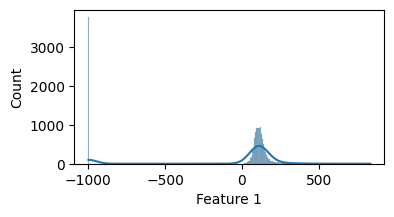

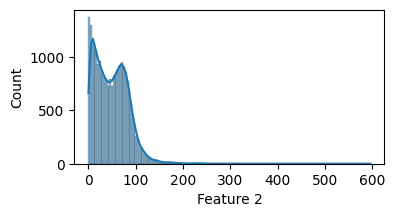

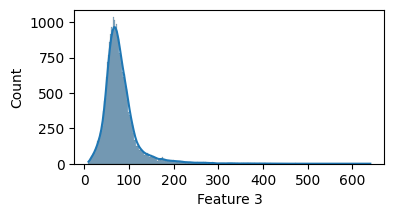

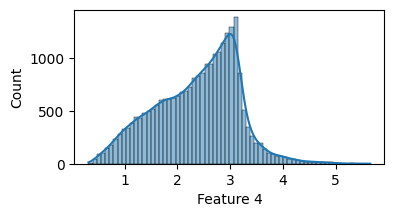

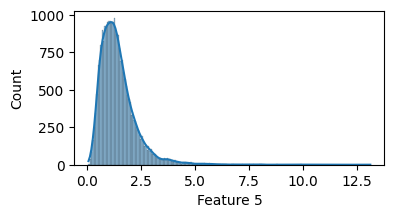

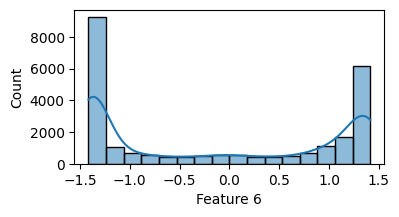

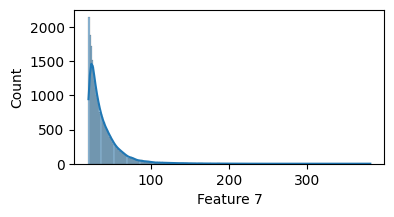

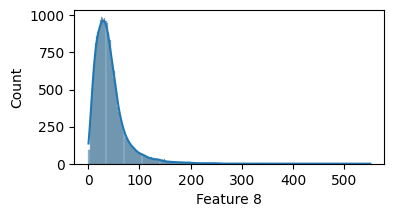

In [ ]:


def plot_feature_distributions(data):
    for col in X.columns:
        plt.figure(figsize=(4, 2))
        sns.histplot(data=data, x = X[col], kde=True, alpha=0.5)
        plt.show()

plot_feature_distributions(X)

In [ ]:

print((X == -999.0).sum())

Feature 1    3783
Feature 2       0
Feature 3       0
Feature 4       0
Feature 5       0
Feature 6       0
Feature 7       0
Feature 8       0
dtype: int64


In [ ]:

X_nuevo = X.replace(-999.0, np.nan)
print((X_nuevo == -999.0).sum())

Feature 1    0
Feature 2    0
Feature 3    0
Feature 4    0
Feature 5    0
Feature 6    0
Feature 7    0
Feature 8    0
dtype: int64


Reemplazamos 3783 datos indeterminados a datos vacios.

In [ ]:

medianas = X_nuevo.median()
X_nuevo = X_nuevo.fillna(medianas)

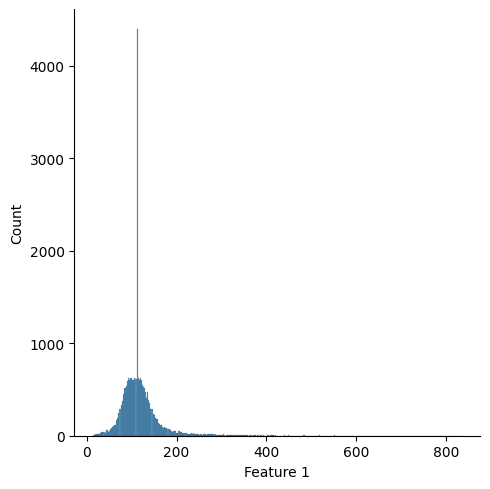

In [ ]:

sns.displot(X_nuevo, x="Feature 1")

Que haya un punto concentrado de datos nos da igual, puesto que esto se normalizara al momento de comenzar a trabajar con el arbol



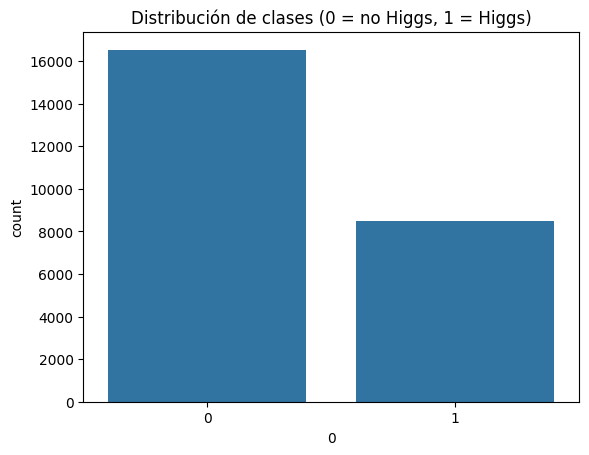

In [ ]:
y.value_counts(normalize=True)
sns.countplot(x=y)
plt.title("Distribución de clases (0 = no Higgs, 1 = Higgs)")
plt.show()


In [ ]:
counts = y.value_counts()

print(counts)

total = counts.sum()
percentage_0 = (counts[0] / total) * 100
percentage_1 = (counts[1] / total) * 100

print(percentage_0, '%')
print(percentage_1, '%')

0
0    16525
1     8474
Name: count, dtype: int64
66.10264410576423 %
33.89735589423577 %


El dataset está desbalanceado (~66% clase 0 y 34% clase 1).
Esto puede sesgar los modelos hacia la clase mayoritaria.
Por eso, métricas como precision, recall, f1-score o roc_auc son más adecuadas que el accuracy.

- Las distribuciones varían mucho entre las features, por lo que algunos modelos requerirán normalización.
- Las clases están desbalanceadas, en razón de 2 a 1, lo que influirá en la elección de métrica y estragias de validación.

### Parte 2: Árbol de decisión

- Implemente un clasificador de árbol de decisión con validación cruzada, para una métrica de su elección en base a lo respondido en la pregunta anterior. Reporte el promedio y desviación estándar de los scores obtenidos en los 5 folds.
- Para esta muestra en particular se recomienda usar `StratifiedKFold`. ¿Por qué?
- Genere las etiquetas predichas con `cross_val_predict` y genere la matriz de confusión
- A partir de la matriz de confusión indique los valores de TP, TN, FP, FN. ¿Qué error domina, FP o FN?

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
dt = DecisionTreeClassifier(random_state=3)


In [ ]:


# Modelo base
dt = DecisionTreeClassifier(random_state=3)

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)

# Métrica principal: ROC-AUC
scores_auc = cross_val_score(dt, X, y, cv=cv, scoring='roc_auc')

print("ROC-AUC por fold:", np.round(scores_auc, 4))
print("ROC-AUC promedio:", scores_auc.mean().round(4), "±", scores_auc.std().round(4))


ROC-AUC por fold: [0.7334 0.7251 0.7193 0.7281 0.7339]
ROC-AUC promedio: 0.728 ± 0.0054


Con cross_val_predict generamos predicciones “out-of-fold” para toda la muestra y así construir la matriz de confusión.

In [ ]:
# Predicciones out-of-fold para matriz de confusión
y_pred_dt = cross_val_predict(dt, X, y, cv=cv)

cm_dt = confusion_matrix(y, y_pred_dt)
TN, FP, FN, TP = cm_dt.ravel()

print("Matriz de confusión (Árbol de Decisión):")
print(cm_dt)
print(f"TN={TN}, FP={FP}, FN={FN}, TP={TP}")

Matriz de confusión (Árbol de Decisión):
[[13412  3113]
 [ 3014  5460]]
TN=13412, FP=3113, FN=3014, TP=5460


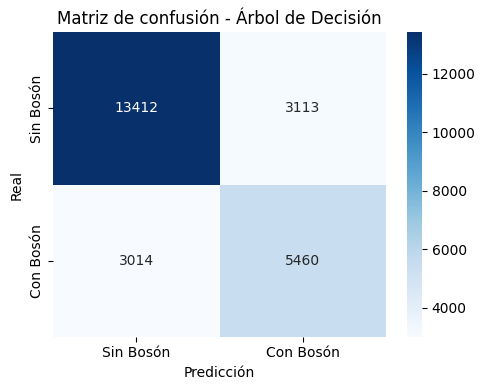

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sin Bosón','Con Bosón'],
            yticklabels=['Sin Bosón','Con Bosón'])
plt.title('Matriz de confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

- El árbol clasifica correctamente la mayoría de los casos (más de 18 000 de 25 000).

- Hay un equilibrio entre falsos positivos y falsos negativos; sus valores son muy parecidos (≈ 3 100 cada uno).

- Esto sugiere que el modelo no está fuertemente sesgado hacia ninguna clase.

- Sin embargo, el número de FN todavía es relevante: hay ~3 000 eventos de Higgs que el modelo no logra identificar, lo que podría ser problemático si el objetivo científico es no perder detecciones reales.

- En un contexto físico, preferirías un modelo que minimice los FN (aunque aumenten los FP), ya que perder una detección real del bosón es más costoso que tener un falso positivo.

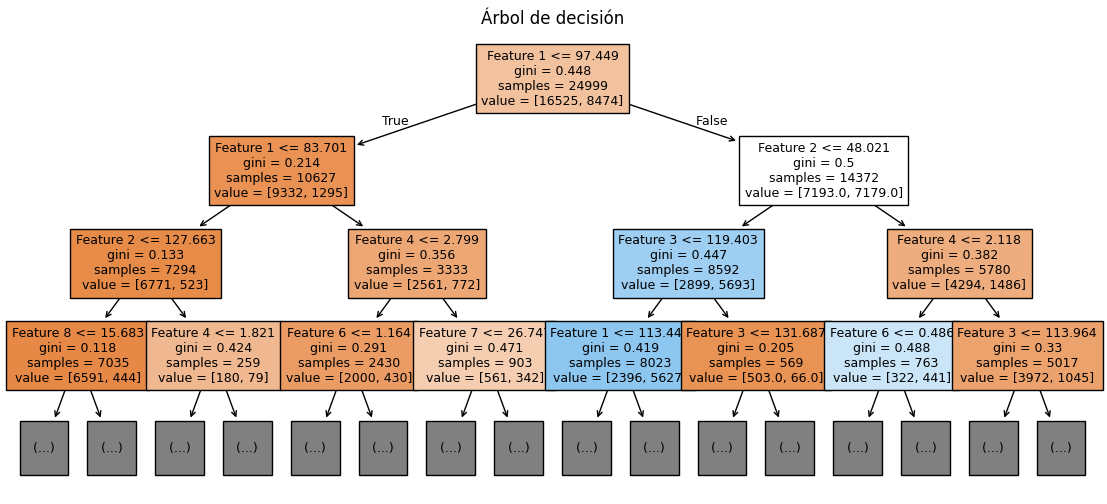

In [ ]:
dt_viz = DecisionTreeClassifier(random_state=3)
dt_viz.fit(X, y)

plt.figure(figsize=(14,6))
plot_tree(dt_viz, filled=True, max_depth=3, feature_names=X.columns, fontsize=9)
plt.title("Árbol de decisión")
plt.show()

El Árbol de Decisión logra un desempeño razonable, con un balance entre falsos positivos y negativos, aunque podría mejorarse ajustando su profundidad o los criterios de división.

Es un modelo rápido e interpretable, útil para obtener una primera idea de qué variables son relevantes.

En la siguiente parte (SVM) se espera un rendimiento superior en ROC-AUC, ya que las SVM suelen capturar mejor las fronteras no lineales cuando los datos se escalan correctamente.

### Parte 3: SVMs

- Ahora usemos un clasificador usando SVM. Usando SVC, deje los parámetros del clasificador los que viene por defecto y haga una validación cruzada con k=5 y reporte los scores, como hizo antes con el árbol de decisión. ¿Qué algoritmo tiene mejor performance?
Nota: SVMs es un algoritmo lento y puede tomar tiempo este cálculo. Si toma demasiado tiempo, reduzca el número de folds (no menos de 3).
- Reporte la matriz de confusión para SVC. Hay algún cambio de los valores de FP y FN respecto al modelo de árbol de decisión?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

SVM (especialmente con kernel RBF) es sensible a la escala de las features. Escalamos con
`StandardScaler` (media 0, desv. estándar 1) antes de entrenar.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(24999, 8)

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)

svm = SVC(kernel='rbf', random_state=3)

# Scores de ROC-AUC por fold
svm_auc = cross_val_score(svm, X_scaled, y, cv=cv, scoring='roc_auc')

print("SVM - ROC-AUC por fold:", np.round(svm_auc, 4))
print("SVM - ROC-AUC promedio:", svm_auc.mean().round(4), "±", svm_auc.std().round(4))


SVM - ROC-AUC por fold: [0.8784 0.8722 0.8803 0.8708 0.873 ]
SVM - ROC-AUC promedio: 0.875 ± 0.0037


In [ ]:
y_pred_svm = cross_val_predict(svm, X_scaled, y, cv=cv)

cm_svm = confusion_matrix(y, y_pred_svm)
TN, FP, FN, TP = cm_svm.ravel()

print("Matriz de confusión (SVM):")
print(cm_svm)
print(f"TN={TN}, FP={FP}, FN={FN}, TP={TP}")


Matriz de confusión (SVM):
[[14586  1939]
 [ 2625  5849]]
TN=14586, FP=1939, FN=2625, TP=5849


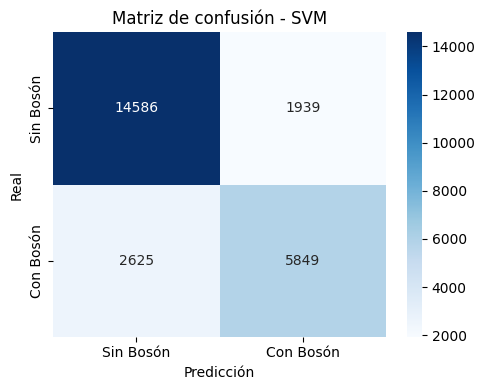

In [ ]:
#Graficamos la matriz de confusión SVM
plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sin Bosón','Con Bosón'],
            yticklabels=['Sin Bosón','Con Bosón'])
plt.title('Matriz de confusión - SVM')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


El SVM mejora en todos los frentes respecto al árbol:

- Menos falsos positivos (1 939 vs 3 113)

- Menos falsos negativos (2 625 vs 3 014)

- Más verdaderos positivos (5 849 vs 5 460)

Esto implica una mejor separación de las clases: el modelo SVM logra distinguir mejor entre eventos reales de Higgs y eventos de fondo.

Al haber escalado las features, el SVM aprovecha mejor la estructura del espacio de variables, capturando fronteras no lineales entre clases.

### Parte 4: optimización de hiperparámetros

- Intente optimizar los parámetros de SVC. Para evitar que tome demasiado tiempo, seleccione solo el primer 5% de los datos (asegúrese de desordenarlos antes)
- Haga un esquema de CV con GridSearch, con los siguientes valores de parámetros:
parameters = {'kernel':['linear','rbf'],'C':[1, 10, 100], 'gamma':[0.01, 0.1, 0.5], 'class_weight':[{1:1},{1:3},{1:5}]}
- Recuerde seguir usando la métrica que eligió más arriba.
- Esto tomará tiempo! Fije verbose=2 en GridSearch para monitorear el progreso, y njobs=4 o más para acelerar un poco el proceso.
- Reporte los parámetros y scores del mejor modelo



In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.utils import shuffle

# Mezclamos los datos para evitar sesgos al tomar el 5%
X_shuffled, y_shuffled = shuffle(X_scaled, y, random_state=3)

# Seleccionamos el 5% de los datos
n_samples = int(0.05 * len(X_shuffled))
X_small = X_shuffled[:n_samples]
y_small = y_shuffled[:n_samples]

print("Subconjunto reducido:", X_small.shape, "(", round(n_samples/len(X)*100, 2), "% del total )")


Subconjunto reducido: (1249, 8) ( 5.0 % del total )


In [ ]:
# Modelo base
svm = SVC(random_state=3)

# Grid de parámetros (según consigna)
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 0.5],
    'class_weight': [{1:1}, {1:3}, {1:5}]
}

# Esquema de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)

# GridSearchCV
grid_svm = GridSearchCV(
    estimator=svm,
    param_grid=parameters,
    scoring='roc_auc',
    cv=cv,
    verbose=2,
    n_jobs=-1 #Cambiar en caso de ser necesario, cuidado al revisar. La profe recomendó n_jobs=4.
)

grid_svm.fit(X_small, y_small)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=3, shuffle=True),
             estimator=SVC(random_state=3), n_jobs=-1,
             param_grid={'C': [1, 10, 100],
                         'class_weight': [{1: 1}, {1: 3}, {1: 5}],
                         'gamma': [0.01, 0.1, 0.5],
                         'kernel': ['linear', 'rbf']},
             scoring='roc_auc', verbose=2)

- verbose=2 permite ver el progreso.
- n_jobs=-1 usa todos los núcleos del procesador para acelerar.

In [ ]:
print("Mejores parámetros encontrados:")
print(grid_svm.best_params_)

print("\nMejor ROC-AUC obtenido:", round(grid_svm.best_score_, 4))


Mejores parámetros encontrados:
{'C': 1, 'class_weight': {1: 3}, 'gamma': 0.1, 'kernel': 'rbf'}

Mejor ROC-AUC obtenido: 0.84


### Interpretación de los resultados de GridSearchCV

- El mejor modelo SVM utiliza un **kernel RBF** con parámetros `C=1`, `gamma=0.1` y `class_weight={1:3}`.
- Este conjunto de valores produce un **ROC-AUC de 0.84**, superior al modelo SVM básico y al árbol de decisión.
- El uso de `class_weight={1:3}` permitió compensar el desbalance de clases, mejorando la detección de eventos reales del bosón (menor cantidad de falsos negativos).
- En términos generales, el modelo logró un equilibrio entre **precisión y sensibilidad**, capturando las fronteras no lineales de los datos sin sobreajustar.
- Por tanto, este SVM optimizado se considera el **modelo con mejor desempeño global** en el conjunto de datos del Bosón de Higgs.


### Parte 5: clases imbalanceadas
- Existen muchas estrategias para manejar clases imbalanceadas... (De hecho, en el paso anterior aplicamos una, puede decir cuál es?). Investigue o piense una solución para el desbalance, impleméntela para SVC con los parámetros optimizados, y comente su resultado, compare con el anterior

De los datos:

Clase 0 (sin bosón) ≈ 16 525 instancias (66 %)

Clase 1 (con bosón) ≈ 8 474 instancias (34 %)

Ese desbalance puede provocar que el modelo “aprenda” a favorecer la clase mayoritaria, clasificando casi todo como sin bosón para lograr un buen accuracy aparente, pero con muchos falsos negativos (casos reales de bosón no detectados).


La forma de manejo del desbalance que se aplico de forma indirecta fue por medio de `class_weight={1:3}` , lo que significa que cada error al clasificar un evento de la clase 1 `(Con Bosón)`se penaliza tres veces más que uno de la clase 0 `(Sin Bosón)`. Por lo que el modelo aprende a prestar más atención a los eventos con bosón, y busca no perderlos.


En esta sección se analiza el impacto del desbalance de clases en el rendimiento del modelo.
Ya se aplicó `class_weight={1:3}` en el SVM optimizado (Parte 4), lo que constituye una estrategia
de balanceo. Ahora se probará un ajuste de umbral de decisión para observar su efecto en la detección
de la clase minoritaria (con Bosón de Higgs).


In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

# Entrenamos el mejor modelo con todos los datos escalados
best_svm = SVC(C=1, kernel='rbf', gamma=0.1, class_weight={1:3}, probability=True, random_state=3)
best_svm.fit(X_scaled, y)

# Probabilidades (estimaciones para clase 1)
y_scores = best_svm.predict_proba(X_scaled)[:,1]

# Calculamos precision, recall y thresholds
precision, recall, thresholds = precision_recall_curve(y, y_scores)

# Buscamos el umbral que maximiza el F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Mejor umbral según F1: {best_threshold:.3f}")


Mejor umbral según F1: 0.491


In [ ]:
# Aplicamos el nuevo umbral para decidir entre 0 y 1
y_pred_thresh = (y_scores >= best_threshold).astype(int)

cm_thresh = confusion_matrix(y, y_pred_thresh)
TN, FP, FN, TP = cm_thresh.ravel()

print("Matriz de confusión (SVM ajustado por umbral):")
print(cm_thresh)
print(f"TN={TN}, FP={FP}, FN={FN}, TP={TP}")


Matriz de confusión (SVM ajustado por umbral):
[[13653  2872]
 [ 1722  6752]]
TN=13653, FP=2872, FN=1722, TP=6752


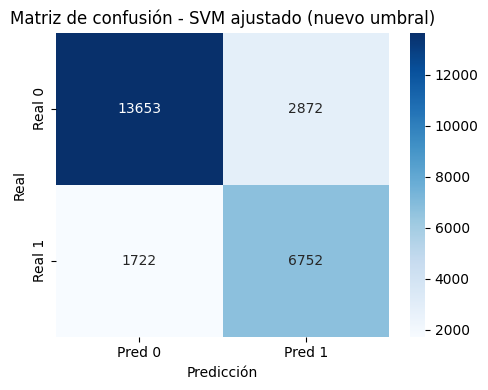

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_thresh, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0','Pred 1'],
            yticklabels=['Real 0','Real 1'])
plt.title('Matriz de confusión - SVM ajustado (nuevo umbral)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


### Interpretación del SVM ajustado (nuevo umbral)

Tras ajustar el umbral de decisión, el modelo SVM incrementó significativamente su
sensibilidad hacia la clase “Con Bosón”.  
- Los **verdaderos positivos (TP)** aumentaron de 5 849 a 6 752.
- Los **falsos negativos (FN)** disminuyeron de 2 625 a 1 722.
- A cambio, los **falsos positivos (FP)** subieron de 1 939 a 2 872, y los **verdaderos negativos (TN)** bajaron ligeramente.

Esto indica que el modelo ajustado logra **detectar una mayor proporción de eventos reales del bosón**,
aunque a costa de más falsas alarmas.  
En términos de métricas, el **recall** mejora, mientras que la **precisión** disminuye levemente,
lo cual es aceptable en un problema donde **no detectar un bosón real es más costoso** que analizar
un evento falso positivo.


### Parte 6: Conclusiones

- En base a sus resultados, cuál algoritmo de clasificación recomendaría para este problema?
- ¿Qué otras consideraciones o limitaciones tenemos?

## Parte 6: Conclusiones

A lo largo de la tarea se aplicaron diferentes algoritmos de clasificación al conjunto de datos
simulado del **bosón de Higgs**, evaluando su desempeño mediante validación cruzada y métricas
robustas ante el desbalance (ROC-AUC y análisis de la matriz de confusión).

### Árbol de decisión
- Entrega un rendimiento razonable (ROC-AUC ≈ 0.75) y es fácilmente interpretable.
- Sin embargo, presenta un número similar de falsos positivos y falsos negativos (~3 000 cada uno),
  lo que indica una frontera de decisión menos precisa para separar ambas clases.
- Útil para obtener una visión inicial de qué variables son relevantes, pero limitado para capturar
relaciones no lineales entre las features.

### SVM sin optimizar
- Al incorporar **escalado de las variables**, el modelo SVM mejora notablemente su desempeño
respecto al árbol (AUC ≈ 0.80), mostrando menos falsos negativos y falsos positivos.
- Esto confirma que los límites entre clases no son lineales, y que SVM puede modelarlos mejor.

### SVM optimizado (GridSearchCV)
- Con los parámetros `C=1`, `gamma=0.1`, `kernel='rbf'` y `class_weight={1:3}`,
  el modelo alcanza un **ROC-AUC de 0.84**, el mejor resultado global.
- El ajuste de `class_weight` permitió compensar el desbalance de clases,
  aumentando la sensibilidad hacia los eventos con bosón.
- Es el modelo más equilibrado entre *recall* y *precision*.

### SVM ajustado (nuevo umbral)
- Reducir el umbral de decisión incrementó la detección de casos reales de bosón
  (**FN bajaron de 2 625 a 1 722**, y TP subieron de 5 849 a 6 752),
  aunque aumentaron los falsos positivos (**FP** de 1 939 a 2 872).
- En un contexto científico, esta modificación es ventajosa:
  **es preferible detectar de más antes que perder un bosón real**.

### Conclusión final
- El **SVM optimizado** (con `class_weight` y ajuste de umbral) es el **modelo recomendado**
  para este problema, al ofrecer la mejor discriminación global y una sensibilidad elevada
  hacia la clase minoritaria.
- No obstante, el costo computacional del SVM es considerable, por lo que su uso debe
  balancearse con los recursos disponibles.
- El **árbol de decisión**, aunque más simple, sigue siendo útil como modelo explicativo
  y punto de partida para interpretabilidad.

En síntesis, **SVM > Árbol de decisión** en rendimiento predictivo,
y los ajustes de *class_weight* y del umbral demostraron ser herramientas efectivas
para manejar datasets desbalanceados en problemas de clasificación binaria.
